<a href="https://colab.research.google.com/github/NeurasysAI/Chest_X-Rays_Pneumpnia_CCN/blob/main/NeuraSys__Chest_X_Rays_Pneumonia_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NeuraSys Medical AI**

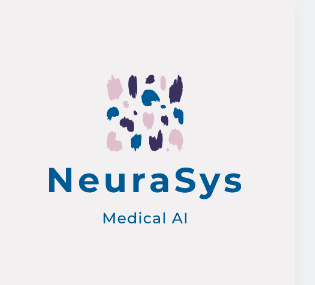


This deep learning algorithm was built to evaluate performance in classifying medical images of the chest.
The target is for the CNN (Convolutional Neural Network) to correctly classify between a normal X-ray image and pneumonia X-ray image.


The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’sMedical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care. For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

## **Download Dataset from google storage**

Run cell and follow steps

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash

In [ ]:
!gsutil cp gs://neurasys-datasets/Chest_X-Rays-Pneumonia.npz .

In [ ]:
!gsutil cp gs://neurasys-datasets/NeuraSys_CNN_X-rays_Pneumonia.h5 .

## **Import Libraries**

In [ ]:
from numpy import *
import tensorflow as tf
import keras
from keras import datasets
from keras.models import load_model
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

## **Load Model**
***The data was processed***

In [ ]:
dataset_pneumonia = np.load('/content/Chest_X-Rays-Pneumonia.npz')
print(dataset_pneumonia.files)

## **Extract Arrays From Dataset**

X train & x test content imagen x-ray normal & x-rays pneumonia.
Y train & y test content Labels witn normal & pneumonia  

In [ ]:
x_train = dataset_pneumonia['x_train']
y_train = dataset_pneumonia['y_train']
x_test = dataset_pneumonia['x_test']
y_test = dataset_pneumonia['y_test']

## **Normalize Data**

Images are 80x80 shaped.
The images are grayscale and the matrices are divided by 255 so that they are scaled from 0 to 1.

In [ ]:
class_names = ['X-Rays Normal','X-Rays Pneumonia']

num_classes = 2

input_shape = (80,80,1)

x_train = x_train.astype("float32") / 255

x_test = x_test.astype("float32") / 255


x_train = x_train.reshape(x_train.shape[0],80,80,1)

x_test = x_test.reshape(x_test.shape[0],80,80,1)

y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)

# **View Images**

In [ ]:
plt.figure()
plt.imshow(np.squeeze(x_test[7]))
plt.colorbar()
plt.grid(False)
plt.show()

## **Load Trained CNN (Convultional Neuronal Network)**

The model contains 2,673,410 parameters


In [ ]:
path_model = '/content/NeuraSys_CNN_X-rays_Pneumonia.h5'
CNN = load_model(path_model)

CNN.summary()

## **CNN Predictions**

Labels: 0 = X-rays normal & 1 = X-rays pneumonia.
The CNN gets accuracy 99% and loss 0.01%

In [ ]:
score = CNN.evaluate(x_test, y_test, verbose=0)
print("test loss:", score[0])
print("test accuracy:", score[1])

test loss: 0.01720198057591915
test accuracy: 0.9983974099159241


In [ ]:
predictions = CNN.predict(x_test)
predictions[67]
np.argmax(predictions[67])
print(class_names[np.argmax(predictions[67])])

X-Rays Normal


## **Predict a single image**

In [ ]:
img_size = 80
img_single = x_test[400]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],80,80,1)

In [ ]:
predictions_single = CNN.predict(img_single)
print(class_names[np.argmax(predictions_single)])
plt.imshow(np.squeeze(img_single))
plt.show()

## **Credits**

Acknowledgements Data: https://data.mendeley.com/datasets/rscbjbr9sj/2 License: CC BY 4.0 Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Dataset source:

Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2